# Python tips and tricks
* Python is a powerful language
* Provides support for many different programming paradigms
* Has an extremely full-featured standard library
* No need to reinvent the wheel
    * Especially when existing wheels are very wheely

<div style="float: left; width: 400px; font-size: 20px; text-align: center;" class="fragment">Python standard library wheel<img src="https://s-media-cache-ak0.pinimg.com/736x/bc/7a/b8/bc7ab89344508fbd96ce39751ead8bf6.jpg"></div>
<div style="margin-left: 40px; float: left; width: 400px; font-size: 20px; text-align: center;" class="fragment">Your wheel<img src="http://i296.photobucket.com/albums/mm192/blk88/Beadlocks/Lateral%20test%202_zps6dd770e7.jpg" width="400px" style="float: right;"></div>

# Knowing a language well is a quick path to programming competence
* One boring `import` statement can can save you hours of algorithmic brilliance
* E.g., regular expressions vs. the `string` module
    * Find all occurrences of the three uppercase letters immediately following "subject"--but only if they're not followed by additional numbers
    * You can be a master of string parsing, or you can learn some regex basics

In [1]:
target = "Exp: 20344@L234342; begin{subjects}:AAA001--NaN//YYY843828--75%//GNEFE82--82%//BOO444--45%"

# Painful and unreliable approach that uses no imports.
# Note that we're cheating by using additional information that's
# in this particular string but may not generalize to others.
sub_part = target.split(':')[2]
subs = sub_part.split('//')
keep = []
for s in subs:
    s = s.split('--')[0]
    if len(s) >= 6 and s[:3].isalpha() and s[3:6].isdigit():
        if len(s) > 6 and s[7].isdigit():
            continue
        keep.append(s[3:6])

print(keep)

['001', '444']


In [2]:
# The correct approach--use regular expressions!
import re
print(re.findall(r'[A-Z]{3}(\d{3})[^\d]*', target))

['001', '444']


# The language-learning Catch-22
* You often don't know there's a better way to do something until you already know the better way to do something
* E.g., how many people actively go looking for "some kind of thing that 'decorates' functions"?

# What helps
* Write a lot of code
* Reading other people's code
* Read programming books, blogs, etc.
* Having other people force their tips and tricks on you

# The gameplan
* We'll start with basic tips and build up to more complex examples
* Many of these tips can save you huge amounts of time in the long run
* But brevity and power sometimes come at the cost of some clarity
    * When in doubt, err on the side of clarity

# String tricks

## Formatting

In [3]:
# The most obvious (and least efficient) way to generate strings: concatenation
name = "Tal Yarkoni"
dob = "10/13/1980"
fingers = 20
social = 8502891742

print("My name is " + name + ". My date of birth is " + dob + ". My social security number is " + \
        str(social) + ", and I have " + str(fingers) + " fingers and toes.")

My name is Tal Yarkoni. My date of birth is 10/13/1980. My social security number is 8502891742, and I have 20 fingers and toes.


In [4]:
# Old-style formatting (but still supported!)
print("My name is %s. My date of birth is %s. My social security number is %d, and I have %.2f fingers and toes." % 
      (name, dob, social, fingers))

My name is Tal Yarkoni. My date of birth is 10/13/1980. My social security number is 8502891742, and I have 20.00 fingers and toes.


In [5]:
# Arguments can be injected later, allowing us to create templates
template = '<div style="font-size: 24px; padding: 20px; color: blue;">The %s showed %s activation in the %s condition.</div>'

from IPython.display import display, HTML
html = HTML(template % ('left IFG', 'increased', 'vocalization'))
display(html)

In [6]:
# New-style formatting
sentence = "The {} {} {animal1} jumped over the {} {animal2} in {:.2f} seconds."

sentence.format('quick', 'brown', 'lazy', 0.7284743, animal1='fox', animal2='dog')

'The quick brown fox jumped over the lazy dog in 0.73 seconds.'

## Regular expressions

In [7]:
# Some very simple regular expressions
import re

marketing_lies = "Four out of 5 doctors recommend using regular expressions at least three times a day."
print(re.search('(\d+)', marketing_lies).groups())

# All words between 5 and 8 characters in length
print(re.findall(r'\b(\w{6,8})\b', marketing_lies))

('5',)
['doctors', 'regular']


In [8]:
# Email validator
patt = re.compile('^.+\\@(\\[?)[a-zA-Z0-9\\-\\.]+\\.([a-zA-Z]{2,3}|[0-9]{1,3})(\\]?)$')

addresses = [
    "this.isn't.a.valid.email@ddress",
    "look_i_have_the_longest_email_address_ever@hotmail.com",
    "bob@bob.com",
    "this@fails.com!"
]

for a in addresses:
    result = "VALID" if patt.match(a) else "INVALID"
    print("%s: %s" % (result, a))

INVALID: this.isn't.a.valid.email@ddress
VALID: look_i_have_the_longest_email_address_ever@hotmail.com
VALID: bob@bob.com
INVALID: this@fails.com!


# Iterable tricks

#### List comprehensions

In [9]:
# List comprehensions
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subjects = [100 + s for s in subjects]
print(subjects)

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


In [10]:
# The explicit for-loop version
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result = []
for s in subjects:
    result.append(s + 100)
subjects = result
print(subjects)

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


In [11]:
# Conditionals can be used to filter lists
subjects = [s for s in subjects if s > 105]
print(subjects)

[106, 107, 108, 109, 110]


#### Nested list comprehensions

In [12]:
# Use these sparingly!
fruit = ['apple', 'banana', 'canteloupe']
animals = ['aardvark', 'bonobo', 'cheetah']
['%s_%s' % (f, a) for f in fruit for a in animals]

['apple_aardvark',
 'apple_bonobo',
 'apple_cheetah',
 'banana_aardvark',
 'banana_bonobo',
 'banana_cheetah',
 'canteloupe_aardvark',
 'canteloupe_bonobo',
 'canteloupe_cheetah']

#### Dictionary comprehensions

In [13]:
# Dictionary comprehensions
my_dict = { 'a': 1, 'b': 5, 'c': 7, 'd': 'orangutan' }
my_reversed_dict = { str(v): k for (k, v) in my_dict.items()}
my_reversed_dict

{'1': 'a', '5': 'b', '7': 'c', 'orangutan': 'd'}

#### zip

In [14]:
# Zip--aggregate elements from iterables.
# Kind of like switching the grouping dimension from
# rows to columns or vice versa in a table.
fruit = ['apple', 'banana', 'canteloupe']
animals = ['aardvark', 'bonobo', 'cheetah']
list(zip(fruit, animals))

[('apple', 'aardvark'), ('banana', 'bonobo'), ('canteloupe', 'cheetah')]

# Assignment tricks

In [15]:
# Multiple assignment
a, b, c = 3, 5, 7

In [16]:
# Variable swapping
a, b = b, a
print("a: %d, b: %d, c: %d" % (a, b, c))

a: 5, b: 3, c: 7


In [17]:
# Iterable unpacking--assign each element of an iterable
# to a different variable.
regions = ['pfc', 'ifg', 'sts']
r1, r2, r3 = regions

In [18]:
# Advanced unpacking (only works in Python 3!)
regions = ['pfc', 'ifg', 'sts', 'atl', 'acc']
first, *rest, last = regions

In [19]:
# Conditional assignment

class Shape(object):
    def __init__(self, sides=None):
        self.sides = sides

    def count(self):
        print(shape.sides if shape.sides <= 20 else 'too many sides to count!')

shape = Shape(22)
shape.count()

too many sides to count!


# Function tricks

#### Lambda functions

In [20]:
# Essentially just an anonymous one-line
# method that saves us some typing.
data = [(3, 4), (1, 2), (0, 1), (2, 7), (3, 3)]
list(filter(lambda x: sum(x) > 5, data))

[(3, 4), (2, 7), (3, 3)]

In [21]:
# Equivalent to...
def sums_to_more_than_five(x):
    return sum(x) > 5

list(filter(sums_to_more_than_five, data))

[(3, 4), (2, 7), (3, 3)]

#### Conditional function calls

In [24]:
# Works just like conditional assignment
def say_hmm(): print("Hmm.")
def say_oh(): print("Oh.")

cnc = 1

say_hmm() if cnc else say_oh()

Hmm.


#### Unpacking optional positional and keyword arguments

In [25]:
def my_amazing_function(a, b, *args, **kwargs):
    """
    A function that sums the first two mandatory arguments,
    plus any other positional arguments, plus the value of
    an optional 'add' keyword argument if it exists.
    """
    total = a + b
    for a in args:
        total += a
    total += kwargs.get('add', 0)
    return total

# This first example will fail--fix it!
# print(my_amazing_function(4))

# # Pass two optional positional args
print(my_amazing_function(4, 3, 3, 7))

# # Pass one positional arg and one keyword arg that's ignored
print(my_amazing_function(4, 3, 3, meow=5))

# # Add a keyword arg that we're on the look-out for
print(my_amazing_function(4, 3, 3, meow=5, add=10))

17
10
20


#### Partial functions

In [26]:
# Partial functions allow us to create a function that pre-fills
# in some of the arguments of another function.

from functools import partial

def character(name, trait, likes):
    return("%s is %s and enjoys %s." % (name, trait, likes))

print(character('Joe', 'lazy', 'ice cream'))

conniver = partial(character, trait='conniving')

print(conniver('Sue', likes='suffering'))

Joe is lazy and enjoys ice cream.
Sue is conniving and enjoys suffering.


# The Python standard library
* Contains all kinds of [good stuff](https://docs.python.org/3/library/). For example:
    * os: operating system tools
    * re: regular expressions
    * collections: useful data structures
    * multiprocessing: simple parallelization tools
    * pickle: serialization
    * json: reading and writing JSON
    * argparse: command-line argument parsing
    * functools: functional programming tools
    * datetime: date and time functions
    * etc. etc. etc.

## collections
* Useful container data types
* Often just as efficient as standard containers like dicts, tuples

#### default dictionaries

In [27]:
# Normal dicts require you to initialize the values of new keys.
# This is annoying.

trees = ['oak', 'oak', 'elm', 'pine', 'oak', 'pine', 'elm']
tree_counts = {}
for t in trees:
    if t not in tree_counts:
        tree_counts[t] = 0
    tree_counts[t] += 1

tree_counts

{'oak': 3, 'elm': 2, 'pine': 2}

In [28]:
# The defaultdict container allows you to set a default type
# for missing keys.

from collections import defaultdict

tree_counts = defaultdict(int)

for t in trees:
    tree_counts[t] += 1

tree_counts

defaultdict(int, {'oak': 3, 'elm': 2, 'pine': 2})

#### ordered dictionaries

In [29]:
# Ordered dictionaries
from collections import OrderedDict

od = OrderedDict()
od['first'] = 14
od['second'] = 7
od['third'] = 8

d = dict()
d['first'] = 14
d['second'] = 7
d['third'] = 8

print("Ordered dictionary:", od.keys())
print("Normal dictionary:", d.keys())

Ordered dictionary: odict_keys(['first', 'second', 'third'])
Normal dictionary: dict_keys(['first', 'second', 'third'])


#### named tuples

In [30]:
# namedtuple--allows element access via attribute name

from collections import namedtuple

Study = namedtuple('Study', ['name', 'authors', 'status'])

my_study = Study(name="best. experiment. ever.", authors="Me, Myself, & I", status="abandoned")

print(my_study.authors)
print(my_study[1])

Me, Myself, & I
Me, Myself, & I


# Object-oriented programming tricks

#### Dynamic attribute access

In [31]:
# A lovely Image class that does absolutely nothing
class Image(object): pass

# We can set any attributes we like
img = Image()
img.shape = (91, 109, 91)
print(img.shape)

(91, 109, 91)


In [32]:
# Create an Image instance
img = Image()

# Set the attribute with setattr
setattr(img, 'shape', (91, 109, 91))

# Two ways of accessing the attribute
print(img.shape)
print(getattr(img, 'shape'))

(91, 109, 91)
(91, 109, 91)


Why would you ever want to use `setattr` and `getattr`? It's just more typing!

In [33]:
class Person(object):
    ''' No shoes, no shirt, no hat, no service! '''
    def __init__(self, shoes, shirt, hat):
        self.shoes = shoes
        self.shirt = shirt
        self.hat = hat

    def get_clothing_item_brand(self, item):
        ''' Return the brand of the specified clothing item. '''
        return getattr(self, item)

In [34]:
bob = Person('Teva', 'Hermes', 'Dunlop')

# Now we can pass in the type of clothing item as a string
bob.get_clothing_item_brand('shoes')

'Teva'

## Magic methods
* Special methods that change the way Python objects behave
* Always start and end with double underscores (e.g., `__init__`)
* Lets you perform... well, magic

In [35]:
class Brain(object):
    
    def __init__(self, owner, age, status):
        self.owner = owner
        self.age = age
        self.status = status
    
    def __repr__(self):
        args = (self.age, self.owner, self.status)
        return "One nondescript gray human brain. Approximately %s years old. Used to be owned by %s. Currently %s." % args


class BrainCollection(object):
    
    def __init__(self, brains):
        self.brains = { b.owner: b for b in brains }
    
    def __iter__(self):
        for b in self.brains.values():
            yield b
    
    def __getitem__(self, key):
        return self.brains[key]

    def __setitem__(self, key, val):
        self.brains[key] = val
    
    def __getattr__(self, key):
        # Note: this would be a *REALLY* bad thing to do in real code
        if key.startswith('get_'):
            name = key.split('_')[1]
            if name in self.brains:
                return lambda: self.brains[name]
        raise AttributeError

In [36]:
# Create a list containing three brains
brains = [
    Brain('Bob', 60, 'hanging out in a jar'),
    Brain('Jane', 28, 'broken'),
    Brain('Ramesh', 15, 'missing')
]

# Initialize our BrainCollection
collection = BrainCollection(brains)

# Now we can take advantage of our magic methods...

# 1. This behavior is defined in __iter__ and __repr__
for brain in collection:
    print(brain)

# 2. This relies on __setitem__
collection['Sue'] = Brain('Sue', 40, 'napping')

# 3. This ungodly creation (ab)uses __getattr__
collection.get_Sue()

One nondescript gray human brain. Approximately 60 years old. Used to be owned by Bob. Currently hanging out in a jar.
One nondescript gray human brain. Approximately 28 years old. Used to be owned by Jane. Currently broken.
One nondescript gray human brain. Approximately 15 years old. Used to be owned by Ramesh. Currently missing.


One nondescript gray human brain. Approximately 40 years old. Used to be owned by Sue. Currently napping.

## Operator overloading
* More magics!
* We can overload common operators like *, +, -, /, etc.
* Enables extremely powerful and compact operations 

### Image conjunction the lazy way

In [37]:
from nibabel import Nifti1Image
from nilearn.image import new_img_like
from nilearn.plotting import plot_stat_map
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LazyMask(Nifti1Image):
    ''' A wrapper for the Nifti1Image class that overloads the & and | operators
    to do logical conjunction and disjunction on the image data. '''

    def __and__(self, other):
        if self.shape != other.shape:
            raise ValueError("Mismatch in image dimensions: %s vs. %s" % (self.shape, other.shape))
        data = np.logical_and(self.get_data(), other.get_data())
        return new_img_like(self, data, self.affine)

    def __or__(self, other):
        if self.shape != other.shape:
            raise ValueError("Mismatch in image dimensions: %s vs. %s" % (self.shape, other.shape))
        data = np.logical_or(self.get_data(), other.get_data())
        return new_img_like(self, data, self.affine)

/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
img1 = LazyMask.load('./images/reward_neurosynth_cluster_labels_PCA=100_k=2.nii.gz')
img2 = LazyMask.load('./images/social_neurosynth_cluster_labels_PCA=100_k=2.nii.gz')
result = img1 & img2

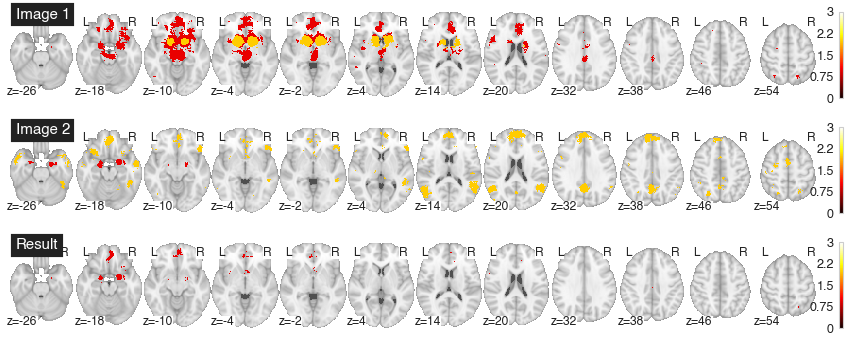

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(15, 6))
p = plot_stat_map(img1, cut_coords=12, display_mode='z', title='Image 1', axes=axes[0], vmax=3)
plot_stat_map(img2, cut_coords=p.cut_coords, display_mode='z', title='Image 2', axes=axes[1], vmax=3)
p = plot_stat_map(result, cut_coords=p.cut_coords, display_mode='z', title='Result', axes=axes[2], vmax=3)

# Decorators
* In Python, decorators are functions that modify other functions
* Added to functions by prefixing them with the @ operator

#### Our function

In [40]:
def repeated_apply(func, args, times=100000):
    ''' A simple function wrapper that calls func with args 
    A whole bunch of times, then returns the first result.
    Also times how long it took to run. '''
    result = []
    for i in range(times):
        result.append(func(args))
    return result[0]

repeated_apply(sum, range(1000))

499500

#### A 'memoize' decorator that caches function results

In [41]:
import time

def memoize(f):
    """ Memoization decorator for a function taking one or more arguments.
    From: http://code.activestate.com/recipes/578231-probably-the-fastest-memoization-decorator-in-the-/
    Also times how long it took to return from the memoized function.
    """
    class memodict(dict):
        def __getitem__(self, *key):
            now = time.time()
            value = dict.__getitem__(self, key)
            elapsed = time.time() - now
            print("Took %.2f seconds to run." % elapsed)
            return value

        def __missing__(self, key):
            ret = self[key] = f(*key)
            return ret

    return memodict().__getitem__

#### Our function, decorated

In [42]:
@memoize
def repeated_apply(func, args, times=100000):
    ''' A simple function wrapper that calls func with args 
    A whole bunch of times, then returns the first result.
    Also times how long it took to run. '''
    result = []
    for i in range(times):
        result.append(func(args))
    return result[0]

In [43]:
repeated_apply(sum, range(1000))

Took 1.30 seconds to run.


499500

# What else?
* What did I miss?
* What's on your list of tips and tricks?